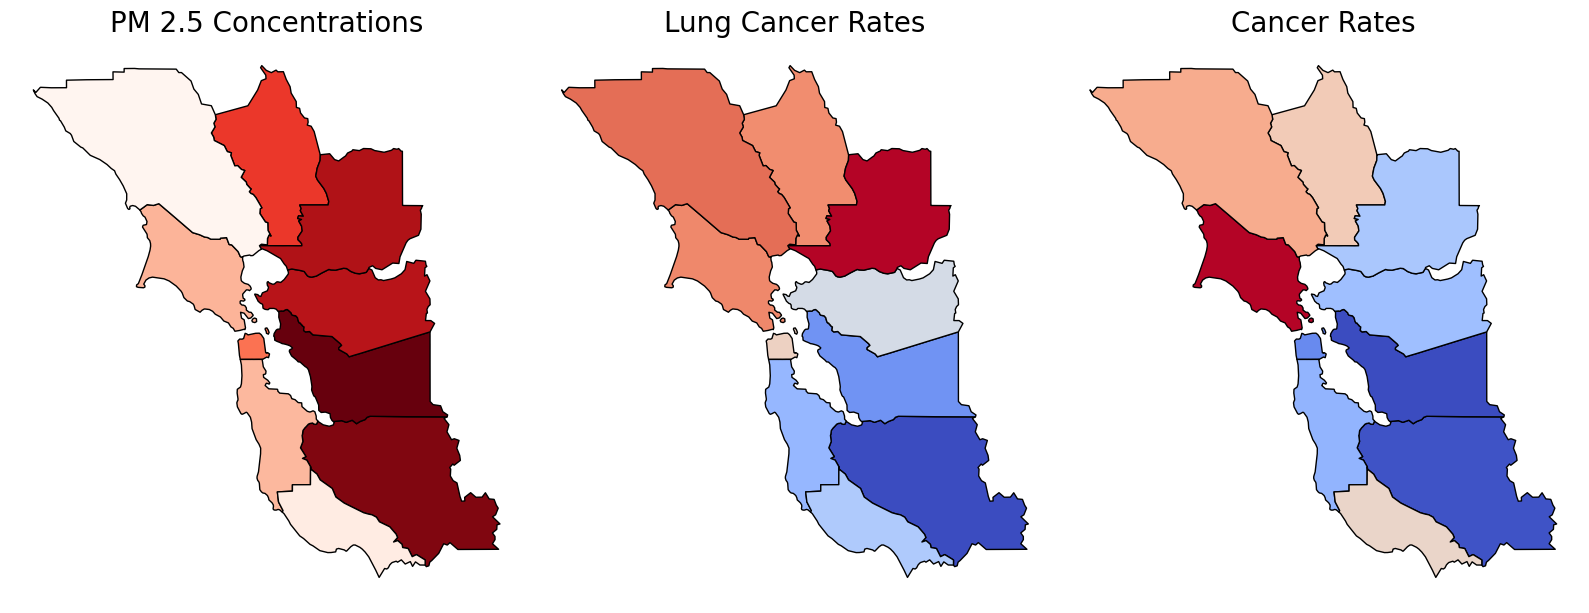

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

gdf = gpd.read_file("cb_2023_us_county_5m/cb_2023_us_county_5m.shp")

gdf = gdf[gdf['STATEFP'] == '06']

pollution_index =  [11.22, 7.72, 8.52, 9.36, 11.42, 10.68, 10.78, 10, 7.5, 8.56]
lung_cancer = [1.79, 2.184, 2.1, 2.438, 1.983, 2.319, 2.923, 2.673, 2.75, 2.687]
cancer = [21.25, 28.43, 24.59, 22.98, 21.02, 25.1, 25.52, 29.11, 30.45, 34.47]
county = ["Santa Clara", "Santa Cruz", "San Mateo", "San Francisco", "Alameda","Contra Costa","Solano" ,"Napa","Sonoma" ,"Marin" 
]

gdf = gdf[gdf['NAME'].isin(county)]

data = pd.DataFrame({
    'NAME': county,
    'pollution_index': pollution_index,      
    'lung_cancer': lung_cancer,
    'cancer': cancer
})

gdf = gdf.merge(data, on='NAME')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))

gdf.plot(
    column='pollution_index',
    cmap='Reds',
    edgecolor='black',
    legend=False,
    ax=ax1
)
ax1.set_title("PM 2.5 Concentrations", fontsize = 20)
ax1.axis('off')

gdf.plot(
    column='lung_cancer',
    cmap='coolwarm',
    edgecolor='black',
    legend=False,
    ax=ax2
)
ax2.set_title("Lung Cancer Rates", fontsize = 20)
ax2.axis('off')

gdf.plot(
    column='cancer',
    cmap='coolwarm', 
    edgecolor='black',
    legend=False,
    ax=ax3
)
ax3.set_title("Cancer Rates", fontsize = 20)
ax3.axis("off")

plt.tight_layout()
plt.show()